In [1]:
import cv2
import os
import numpy as np
from PIL import Image as im
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import matplotlib.pyplot as plt
%matplotlib inline 
from warnings import filterwarnings
filterwarnings('ignore')
import tensorflow as tf
import pandas as pd
from scipy.stats import stats
import matplotlib.image as mpimg
import pandas as pd
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [47]:
import Augmentor
p = Augmentor.Pipeline("C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\yalefaces\\test\\s5")
p.rotate(probability=0.7, max_left_rotation=0.5, max_right_rotation=0.5)
p.sample(50)

Processing <PIL.Image.Image image mode=L size=320x243 at 0x25608970748>:   6%|▏   | 3/50 [00:00<00:04,  9.73 Samples/s]

Initialised with 5 image(s) found.
Output directory set to C:\Users\Maria\Desktop\FRANCIS\FALL SEM 21-22\IMP\our  project\yalefaces\test\s5\output.

Processing <PIL.Image.Image image mode=L size=320x243 at 0x25611FFE400>: 100%|██| 50/50 [00:00<00:00, 159.46 Samples/s]


In [4]:
data=[]
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])

for i in range(1,7):
    img1 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\yalefaces\\train\\s1\\'+str(i)+'.jpg')
    new_image1 = img1.resize((256,256))
    image_arr1 = np.array(new_image1)
    image_sharp1 = cv2.filter2D(src=image_arr1, ddepth=-1, kernel=kernel)
    image_sharp1 = cv2.cvtColor(image_sharp1,cv2.COLOR_GRAY2RGB)
    data.append([image_sharp1,0])


for i in range(1,201):
    img1 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\yalefaces\\train\\s1\\output\\1 ('+str(i)+').jpg')
    new_image1 = img1.resize((256,256))
    image_arr1 = np.array(new_image1)
    image_sharp1 = cv2.filter2D(src=image_arr1, ddepth=-1, kernel=kernel)
    image_sharp1 = cv2.cvtColor(image_sharp1,cv2.COLOR_GRAY2RGB)
    data.append([image_sharp1,0])


    
for i in range(1,7):
    img2 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\yalefaces\\train\\s2\\'+str(i)+'.jpg')
    new_image2 = img2.resize((256,256))
    image_arr2 = np.array(new_image2)
    image_sharp2 = cv2.filter2D(src=image_arr2, ddepth=-1, kernel=kernel)
    image_sharp2 = cv2.cvtColor(image_sharp2,cv2.COLOR_GRAY2RGB)
    data.append([image_sharp2,1])

    
for i in range(1,201):
    img2 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\yalefaces\\train\\s2\\output\\1 ('+str(i)+').jpg')
    new_image2 = img2.resize((256,256))
    image_arr2 = np.array(new_image2)
    image_sharp2 = cv2.filter2D(src=image_arr2, ddepth=-1, kernel=kernel)
    image_sharp2 = cv2.cvtColor(image_sharp2,cv2.COLOR_GRAY2RGB)
    data.append([image_sharp2,1])
    
    
for i in range(1,7):
    
    img3 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\yalefaces\\train\\s3\\'+str(i)+'.jpg')
    new_image3 = img3.resize((256,256))
    image_arr3 = np.array(new_image3)
    image_sharp3 = cv2.filter2D(src=image_arr3, ddepth=-1, kernel=kernel)
    image_sharp3 = cv2.cvtColor(image_sharp3,cv2.COLOR_GRAY2RGB)
    data.append([image_sharp3,2])


for i in range(1,201):
    img3 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\yalefaces\\train\\s3\\output\\1 ('+str(i)+').jpg')
    new_image3 = img3.resize((256,256))
    image_arr3 = np.array(new_image3)
    image_sharp3 = cv2.filter2D(src=image_arr3, ddepth=-1, kernel=kernel)
    image_sharp3 = cv2.cvtColor(image_sharp3,cv2.COLOR_GRAY2RGB)
    data.append([image_sharp3,2])
    
    
for i in range(1,7):
    
    img4 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\yalefaces\\train\\s4\\'+str(i)+'.jpg')
    new_image4 = img4.resize((256,256))
    image_arr4 = np.array(new_image4)
    image_sharp4 = cv2.filter2D(src=image_arr4, ddepth=-1, kernel=kernel)
    image_sharp4 = cv2.cvtColor(image_sharp4,cv2.COLOR_GRAY2RGB)
    data.append([image_sharp4,3])
    

for i in range(1,201):
    img4 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\yalefaces\\train\\s4\\output\\1 ('+str(i)+').jpg')
    new_image4 = img4.resize((256,256))
    image_arr4 = np.array(new_image4)
    image_sharp4 = cv2.filter2D(src=image_arr4, ddepth=-1, kernel=kernel)
    image_sharp4 = cv2.cvtColor(image_sharp4,cv2.COLOR_GRAY2RGB)
    data.append([image_sharp4,3])
    

for i in range(1,7):
    
    img4 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\yalefaces\\train\\s5\\'+str(i)+'.jpg')
    new_image4 = img4.resize((256,256))
    image_arr4 = np.array(new_image4)
    image_sharp4 = cv2.filter2D(src=image_arr4, ddepth=-1, kernel=kernel)
    image_sharp4 = cv2.cvtColor(image_sharp4,cv2.COLOR_GRAY2RGB)
    data.append([image_sharp4,4])
    

for i in range(1,201):
    img4 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\yalefaces\\train\\s5\\output\\1 ('+str(i)+').jpg')
    new_image4 = img4.resize((256,256))
    image_arr4 = np.array(new_image4)
    image_sharp4 = cv2.filter2D(src=image_arr4, ddepth=-1, kernel=kernel)
    image_sharp4 = cv2.cvtColor(image_sharp4,cv2.COLOR_GRAY2RGB)
    data.append([image_sharp4,4])
    
    

print(data)

[[array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0

In [3]:
data=[]
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])

for i in range(1,7):
    img1 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\yalefaces\\train\\s1\\'+str(i)+'.jpg')
    new_image1 = img1.resize((256,256))
    image_arr1 = np.array(new_image1)
    image_sharp1 = cv2.filter2D(src=image_arr1, ddepth=-1, kernel=kernel)
    image_sharp1 = cv2.cvtColor(image_sharp1,cv2.COLOR_GRAY2RGB)
    data.append([image_sharp1,0])


    
for i in range(1,7):
    img2 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\yalefaces\\train\\s2\\'+str(i)+'.jpg')
    new_image2 = img2.resize((256,256))
    image_arr2 = np.array(new_image2)
    image_sharp2 = cv2.filter2D(src=image_arr2, ddepth=-1, kernel=kernel)
    image_sharp2 = cv2.cvtColor(image_sharp2,cv2.COLOR_GRAY2RGB)
    data.append([image_sharp2,1])


    
    
for i in range(1,7):
    
    img3 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\yalefaces\\train\\s3\\'+str(i)+'.jpg')
    new_image3 = img3.resize((256,256))
    image_arr3 = np.array(new_image3)
    image_sharp3 = cv2.filter2D(src=image_arr3, ddepth=-1, kernel=kernel)
    image_sharp3 = cv2.cvtColor(image_sharp3,cv2.COLOR_GRAY2RGB)
    data.append([image_sharp3,2])

    
    
for i in range(1,7):
    
    img4 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\yalefaces\\train\\s4\\'+str(i)+'.jpg')
    new_image4 = img4.resize((256,256))
    image_arr4 = np.array(new_image4)
    image_sharp4 = cv2.filter2D(src=image_arr4, ddepth=-1, kernel=kernel)
    image_sharp4 = cv2.cvtColor(image_sharp4,cv2.COLOR_GRAY2RGB)
    data.append([image_sharp4,3])
    

for i in range(1,7):
    
    img4 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\yalefaces\\train\\s5\\'+str(i)+'.jpg')
    new_image4 = img4.resize((256,256))
    image_arr4 = np.array(new_image4)
    image_sharp4 = cv2.filter2D(src=image_arr4, ddepth=-1, kernel=kernel)
    image_sharp4 = cv2.cvtColor(image_sharp4,cv2.COLOR_GRAY2RGB)
    data.append([image_sharp4,4])
    

print(data)

[[array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0

In [5]:
data2=[]

kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])


for i in range(7,13):
    img1 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\yalefaces\\test\\s1\\'+str(i)+'.jpg')
    new_image1 = img1.resize((256,256))
    image_arr1 = np.array(new_image1)
    image_sharp1 = cv2.filter2D(src=image_arr1, ddepth=-1, kernel=kernel)
    image_sharp1 = cv2.cvtColor(image_sharp1,cv2.COLOR_GRAY2RGB)
    data2.append([image_sharp1,0])
   

for i in range(7,12):
    img2 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\yalefaces\\test\\s2\\'+str(i)+'.jpg')
    new_image2 = img2.resize((256,256))
    image_arr2 = np.array(new_image2)
    image_sharp2 = cv2.filter2D(src=image_arr2, ddepth=-1, kernel=kernel)
    image_sharp2 = cv2.cvtColor(image_sharp2,cv2.COLOR_GRAY2RGB)
    data2.append([image_sharp2,1])


    
      
    
for i in range(7,12):
    
    img3 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\yalefaces\\test\\s3\\'+str(i)+'.jpg')
    new_image3 = img3.resize((256,256))
    image_arr3 = np.array(new_image3)
    image_sharp3 = cv2.filter2D(src=image_arr3, ddepth=-1, kernel=kernel)
    image_sharp3 = cv2.cvtColor(image_sharp3,cv2.COLOR_GRAY2RGB)
    data2.append([image_sharp3,2])


    
    
for i in range(7,12):
    
    img4 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\yalefaces\\test\\s4\\'+str(i)+'.jpg')
    new_image4 = img4.resize((256,256))
    image_arr4 = np.array(new_image4)
    image_sharp4 = cv2.filter2D(src=image_arr4, ddepth=-1, kernel=kernel)
    image_sharp4 = cv2.cvtColor(image_sharp4,cv2.COLOR_GRAY2RGB)
    data2.append([image_sharp4,3])
    

    

for i in range(7,12):
    
    img4 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\yalefaces\\test\\s5\\'+str(i)+'.jpg')
    new_image4 = img4.resize((256,256))
    image_arr4 = np.array(new_image4)
    image_sharp4 = cv2.filter2D(src=image_arr4, ddepth=-1, kernel=kernel)
    image_sharp4 = cv2.cvtColor(image_sharp4,cv2.COLOR_GRAY2RGB)
    data2.append([image_sharp4,4])



print(data2)

[[array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0

In [49]:
data2=[]

kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])


for i in range(7,13):
    img1 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\yalefaces\\test\\s1\\'+str(i)+'.jpg')
    new_image1 = img1.resize((256,256))
    image_arr1 = np.array(new_image1)
    image_sharp1 = cv2.filter2D(src=image_arr1, ddepth=-1, kernel=kernel)
    image_sharp1 = cv2.cvtColor(image_sharp1,cv2.COLOR_GRAY2RGB)
    data2.append([image_sharp1,0])


for i in range(1,51):
    img1 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\yalefaces\\test\\s1\\output\\1 ('+str(i)+').jpg')
    new_image1 = img1.resize((256,256))
    image_arr1 = np.array(new_image1)
    image_sharp1 = cv2.filter2D(src=image_arr1, ddepth=-1, kernel=kernel)
    image_sharp1 = cv2.cvtColor(image_sharp1,cv2.COLOR_GRAY2RGB)
    data2.append([image_sharp1,0])

    

for i in range(7,12):
    img2 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\yalefaces\\test\\s2\\'+str(i)+'.jpg')
    new_image2 = img2.resize((256,256))
    image_arr2 = np.array(new_image2)
    image_sharp2 = cv2.filter2D(src=image_arr2, ddepth=-1, kernel=kernel)
    image_sharp2 = cv2.cvtColor(image_sharp2,cv2.COLOR_GRAY2RGB)
    data2.append([image_sharp2,1])


for i in range(1,51):
    img2 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\yalefaces\\test\\s2\\output\\1 ('+str(i)+').jpg')
    new_image2 = img2.resize((256,256))
    image_arr2 = np.array(new_image2)
    image_sharp2 = cv2.filter2D(src=image_arr2, ddepth=-1, kernel=kernel)
    image_sharp2 = cv2.cvtColor(image_sharp2,cv2.COLOR_GRAY2RGB)
    data2.append([image_sharp2,1])
    
      
    
for i in range(7,12):
    
    img3 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\yalefaces\\test\\s3\\'+str(i)+'.jpg')
    new_image3 = img3.resize((256,256))
    image_arr3 = np.array(new_image3)
    image_sharp3 = cv2.filter2D(src=image_arr3, ddepth=-1, kernel=kernel)
    image_sharp3 = cv2.cvtColor(image_sharp3,cv2.COLOR_GRAY2RGB)
    data2.append([image_sharp3,2])

for i in range(1,51):
    img3 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\yalefaces\\test\\s3\\output\\1 ('+str(i)+').jpg')
    new_image3 = img3.resize((256,256))
    image_arr3 = np.array(new_image3)
    image_sharp3 = cv2.filter2D(src=image_arr3, ddepth=-1, kernel=kernel)
    image_sharp3 = cv2.cvtColor(image_sharp3,cv2.COLOR_GRAY2RGB)
    data2.append([image_sharp3,2])
    
    
for i in range(7,12):
    
    img4 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\yalefaces\\test\\s4\\'+str(i)+'.jpg')
    new_image4 = img4.resize((256,256))
    image_arr4 = np.array(new_image4)
    image_sharp4 = cv2.filter2D(src=image_arr4, ddepth=-1, kernel=kernel)
    image_sharp4 = cv2.cvtColor(image_sharp4,cv2.COLOR_GRAY2RGB)
    data2.append([image_sharp4,3])
    
for i in range(1,51):
    img4 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\yalefaces\\test\\s4\\output\\1 ('+str(i)+').jpg')
    new_image4 = img4.resize((256,256))
    image_arr4 = np.array(new_image4)
    image_sharp4 = cv2.filter2D(src=image_arr4, ddepth=-1, kernel=kernel)
    image_sharp4 = cv2.cvtColor(image_sharp4,cv2.COLOR_GRAY2RGB)
    data2.append([image_sharp4,3])
    

for i in range(7,12):
    
    img4 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\yalefaces\\test\\s5\\'+str(i)+'.jpg')
    new_image4 = img4.resize((256,256))
    image_arr4 = np.array(new_image4)
    image_sharp4 = cv2.filter2D(src=image_arr4, ddepth=-1, kernel=kernel)
    image_sharp4 = cv2.cvtColor(image_sharp4,cv2.COLOR_GRAY2RGB)
    data2.append([image_sharp4,4])

for i in range(1,51):
    img4 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\yalefaces\\test\\s5\\output\\1 ('+str(i)+').jpg')
    new_image4 = img4.resize((256,256))
    image_arr4 = np.array(new_image4)
    image_sharp4 = cv2.filter2D(src=image_arr4, ddepth=-1, kernel=kernel)
    image_sharp4 = cv2.cvtColor(image_sharp4,cv2.COLOR_GRAY2RGB)
    data2.append([image_sharp4,4])   
    

print(data2)

[[array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0

In [6]:
import random 
random.shuffle(data)
random.shuffle(data2)

X_train =[]
y_train =[]
for features, label in data:
  X_train.append(features)
  y_train.append(label)
  
X_train = np.array(X_train).reshape(-1,256,256,3)


X_test =[]
y_test =[]
for features, label in data2:
  X_test.append(features)
  y_test.append(label)
  
X_test = np.array(X_test).reshape(-1,256,256,3)

X_train = X_train.astype('float32')

X_train /= 255

from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train,5)
y_test = np_utils.to_categorical(y_test,5)

Using TensorFlow backend.


In [7]:
cnn = Sequential()
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(256,256,3)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(256,256,3)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(256,256,3)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(64, (3, 3), activation="relu", input_shape=(256,256,3)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(64, (3, 3), activation="relu", input_shape=(256,256,3)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Flatten())
cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'relu', units = 64))
cnn.add(Dense(units=5, activation="softmax"))
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [8]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        1

In [9]:
hist= cnn.fit(X_train, y_train, batch_size =50, epochs =10, verbose = 1, validation_data = (X_test, y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 1030 samples, validate on 26 samples
Epoch 1/10
1030/1030 [==============================] - 78s 75ms/sample - loss: 0.3167 - acc: 0.8672 - val_loss: 0.4719 - val_acc: 0.9692
Epoch 2/10
1030/1030 [==============================] - 73s 71ms/sample - loss: 0.0053 - acc: 0.9998 - val_loss: 0.4719 - val_acc: 0.9692
Epoch 3/10
1030/1030 [==============================] - 77s 75ms/sample - loss: 1.7261e-05 - acc: 1.0000 - val_loss: 0.4719 - val_acc: 0.9692
Epoch 4/10
1030/1030 [==============================] - 75s 73ms/sample - loss: 5.0022e-07 - acc: 1.0000 - val_loss: 0.4719 - val_acc: 0.9692
Epoch 5/10
1030/1030 [==============================] - 75s 73ms/sample - loss: 2.6538e-07 - acc: 1.0000 - val_loss: 0.4719 - val_acc: 0.9692
Epoch 6/10
1030/1030 [==============================] - 74s 72ms/sample - loss: 2.2070e-07 - acc: 1.0000 - val_loss: 0.4719 - val_acc: 0.9692
Epoch 7/10
1030/

In [10]:
score = cnn.evaluate(X_test, y_test, verbose = 0)
score_cnn=score[1]*100
print("Test accuracy: ", score[1]*100)

Test accuracy:  96.92307710647583


# 2.ML

In [11]:
neutral = []
categ=[]

kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])

for i in range(1,7):
    
    img1 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\yalefaces\\train\\s1\\'+str(i)+'.jpg')
    
    
    img1 = img1.resize((128,128), im.ANTIALIAS)
    
    
    image_arr1 = np.array(img1)
    image_sharp1 = cv2.filter2D(src=image_arr1, ddepth=-1, kernel=kernel)
    
    
    
    
    img6=  image_sharp1.flatten()
   
    
    
    neutral.append(img6)
    categ.append(0)
    

for i in range(1,7):
    
    
    img2 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\yalefaces\\train\\s2\\'+str(i)+'.jpg')
   
    
    img2 = img2.resize((128,128), im.ANTIALIAS)
    
    
    image_arr2 = np.array(img2)
    image_sharp2 = cv2.filter2D(src=image_arr2, ddepth=-1, kernel=kernel)
    

    img7 = image_sharp2.flatten()
    
    neutral.append(img7)
    categ.append(1)
   

for i in range(1,7):
    
    
    img3 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\yalefaces\\train\\s3\\'+str(i)+'.jpg')
    
    img3 = img3.resize((128,128), im.ANTIALIAS)
    

    image_arr3 = np.array(img3)
    image_sharp3 = cv2.filter2D(src=image_arr3, ddepth=-1, kernel=kernel)
    

    img8 = image_sharp3.flatten()
    
    neutral.append(img8)
    categ.append(2)
    

for i in range(1,7):
    
    
    img4 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\yalefaces\\train\\s4\\'+str(i)+'.jpg')

    img4 = img4.resize((128,128), im.ANTIALIAS)
    

    image_arr4 = np.array(img4)
    image_sharp4 = cv2.filter2D(src=image_arr4, ddepth=-1, kernel=kernel)
    

    img9 =  image_sharp4.flatten()
    

    neutral.append(img9)
    categ.append(3)
    

for i in range(1,7):
    
    
    img4 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\yalefaces\\train\\s5\\'+str(i)+'.jpg')

    img4 = img4.resize((128,128), im.ANTIALIAS)
    

    image_arr4 = np.array(img4)
    image_sharp4 = cv2.filter2D(src=image_arr4, ddepth=-1, kernel=kernel)
    

    img9 =  image_sharp4.flatten()
    

    neutral.append(img9)
    categ.append(4)
    



In [12]:
neut=np.array(neutral)

df=pd.DataFrame(neut)

target=np.array(categ)

df['Target']=target

In [13]:
df

,0,1,2,3,4,5,6,7,8,9,...,16375,16376,16377,16378,16379,16380,16381,16382,16383,Target
0,66,66,66,66,66,66,66,66,66,66,...,0,0,0,0,0,0,0,0,0,0
1,66,66,66,66,66,66,66,66,66,66,...,0,0,0,0,0,0,0,0,0,0
2,66,66,66,66,66,66,66,66,66,66,...,0,0,0,0,0,0,0,0,0,0
3,66,66,66,66,66,66,66,66,66,66,...,0,0,0,0,0,0,0,0,0,0
4,61,67,67,62,63,62,67,66,67,62,...,9,0,0,15,17,0,0,16,15,0
5,66,66,66,66,66,66,66,66,66,66,...,0,0,0,0,0,0,0,0,0,0
6,66,66,66,66,66,66,66,66,66,66,...,0,0,0,0,0,0,0,0,0,1
7,0,73,58,80,13,43,88,0,51,73,...,0,0,45,40,0,0,14,0,0,1
8,0,73,57,86,8,38,95,0,52,71,...,0,0,40,35,0,0,14,0,0,1
9,0,74,57,85,13,37,95,0,52,72,...,0,0,45,42,0,0,22,0,0,1


In [14]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x_train=x
y_train=y

In [15]:
neutral = []
categ=[]

kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])

for i in range(7,13):
    
    img1 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\yalefaces\\test\\s1\\'+str(i)+'.jpg')
    
    
    img1 = img1.resize((128,128), im.ANTIALIAS)
    
    
    image_arr1 = np.array(img1)
    image_sharp1 = cv2.filter2D(src=image_arr1, ddepth=-1, kernel=kernel)
    
    
    
    
    img6=  image_sharp1.flatten()
   
    
    
    neutral.append(img6)
    categ.append(0)
    

for i in range(7,12):
    
    
    img2 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\yalefaces\\test\\s2\\'+str(i)+'.jpg')
   
    
    img2 = img2.resize((128,128), im.ANTIALIAS)
    
    
    image_arr2 = np.array(img2)
    image_sharp2 = cv2.filter2D(src=image_arr2, ddepth=-1, kernel=kernel)
    

    img7 = image_sharp2.flatten()
    
    neutral.append(img7)
    categ.append(1)
   

for i in range(7,12):
    
    
    img3 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\yalefaces\\test\\s3\\'+str(i)+'.jpg')
    
    img3 = img3.resize((128,128), im.ANTIALIAS)
    

    image_arr3 = np.array(img3)
    image_sharp3 = cv2.filter2D(src=image_arr3, ddepth=-1, kernel=kernel)
    

    img8 = image_sharp3.flatten()
    
    neutral.append(img8)
    categ.append(2)
    

for i in range(7,12):
    
    
    img4 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\yalefaces\\test\\s4\\'+str(i)+'.jpg')

    img4 = img4.resize((128,128), im.ANTIALIAS)
    

    image_arr4 = np.array(img4)
    image_sharp4 = cv2.filter2D(src=image_arr4, ddepth=-1, kernel=kernel)
    

    img9 =  image_sharp4.flatten()
    

    neutral.append(img9)
    categ.append(3)
    

for i in range(7,12):
    
    
    img4 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\yalefaces\\test\\s5\\'+str(i)+'.jpg')

    img4 = img4.resize((128,128), im.ANTIALIAS)
    

    image_arr4 = np.array(img4)
    image_sharp4 = cv2.filter2D(src=image_arr4, ddepth=-1, kernel=kernel)
    

    img9 =  image_sharp4.flatten()
    

    neutral.append(img9)
    categ.append(4)
    



In [16]:
n2=np.array(neutral)
c2=np.array(categ)

n2.shape

(26, 16384)

In [17]:
df2=pd.DataFrame(n2)

target=np.array(c2)

df2['Target']=target

In [18]:
x=df2.iloc[:,:-1]
y=df2.iloc[:,-1]

x_test=x
y_test=y

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_cm(y_true, y_pred, figsize=(5,5)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)

In [20]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=100,max_depth=30,random_state=50)
forest.fit(x_train,y_train)
test=forest.predict(x_test)

score_rf=accuracy_score(test,y_test)
print(classification_report(y_test,test)) 

              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       0.71      1.00      0.83         5
           4       1.00      0.80      0.89         5

    accuracy                           0.92        26
   macro avg       0.94      0.93      0.93        26
weighted avg       0.95      0.92      0.93        26



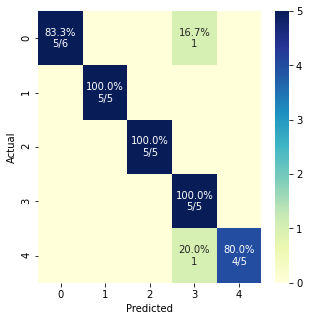

In [21]:
plot_cm(y_test,test)

In [22]:
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)
print("The training of the model is started, please wait for while as it may take few minutes to complete")
model=GridSearchCV(svc,param_grid)
model.fit(x_train,y_train)
print('The Model is trained well with the given images')
model.best_params_

The training of the model is started, please wait for while as it may take few minutes to complete
The Model is trained well with the given images


{'C': 0.1, 'gamma': 0.0001, 'kernel': 'poly'}

In [23]:
y_pred=model.predict(x_test)
acc_ml=accuracy_score(y_pred,y_test)*100
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")

The model is 84.61538461538461% accurate


In [24]:
print(classification_report(y_test,y_pred)) 

              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       1.00      0.80      0.89         5
           2       0.62      1.00      0.77         5
           3       1.00      0.80      0.89         5
           4       1.00      0.80      0.89         5

    accuracy                           0.85        26
   macro avg       0.89      0.85      0.85        26
weighted avg       0.89      0.85      0.85        26



In [25]:
def detect_face(img):
   
    face_cascade = cv2.CascadeClassifier('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\haarcascade_frontalface_alt.xml')
    faces = face_cascade.detectMultiScale(img, scaleFactor=1.2, minNeighbors=0);
    
    if (len(faces) == 0):
        return None, None
    
    (x, y, w, h) = faces[0]

    return img, faces[0]

In [26]:
def draw_rectangle(img, rect):
    (x, y, w, h) = rect
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

def draw_text(img, text, x, y):
    cv2.putText(img, text, (x, y), cv2.FONT_HERSHEY_PLAIN,1.3, (0, 255, 0), 2)

In [27]:
subjects = ["","Angelina", "Mohanlal","Mammotty","Gal Gadot"]

In [28]:
def prepare_training_data(data_folder_path):
    
    
    dirs = os.listdir(data_folder_path)
    faces = []
    labels = []
    
    
    for dir_name in dirs:
        
        
        if not dir_name.startswith("s"):
            continue;
            
        
        label = int(dir_name.replace("s", ""))
        
        subject_dir_path = data_folder_path + "\\" + dir_name
        
        subject_images_names = os.listdir(subject_dir_path)
        
    
        for image_name in subject_images_names:
            
            if image_name.startswith("."):
                continue;
            
            image_path = subject_dir_path + "\\" + image_name

            image = im.open(image_path)
            
            img=np.array(image)
            
            cv2.imshow("Training on image...", img)
            cv2.waitKey(1)
            
            face, rect = detect_face(img)
            
            if face is not None:
                
                faces.append(face)
                labels.append(label)
            
    cv2.destroyAllWindows()
    cv2.waitKey(1)
    cv2.destroyAllWindows()
    
    return faces, labels


In [29]:
print("Preparing data...")
faces, labels = prepare_training_data("C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\yalefaces\\train_lb")
print("Data prepared")

print("Total faces: ", len(faces))
print("Total labels: ", len(labels))

Preparing data...
Data prepared
Total faces:  30
Total labels:  30


In [30]:
def predict(test_img):
    
    img = test_img.copy()
    
    face, rect = detect_face(img)
    

    
    label= face_recognizer.predict(face)
    
    print(label[0])
    
    
    
    label_text = subjects[label[0]]
    
    
    draw_rectangle(img, rect)
    draw_text(img, label_text, rect[0], rect[1]-5)
    
    return img

In [31]:
face_recognizer1 = cv2.face.FisherFaceRecognizer_create()

face_recognizer2 = cv2.face.LBPHFaceRecognizer_create()

face_recognizer3 = cv2.face.EigenFaceRecognizer_create()

faces=np.array(faces)
labels=np.array(labels)

face_recognizer1.train(faces,labels)
face_recognizer2.train(faces,labels)
face_recognizer3.train(faces,labels)

In [32]:
g=[1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5]
p_lb=[]
for i in range(1,41):
    
    img1 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\yalefaces\\test_mc\\'+str(i)+'.jpg')
    img_arr1=np.array(img1)
    img = img_arr1.copy()
    face, rect = detect_face(img)
    label= face_recognizer2.predict(face)
    p_lb.append(label[0])
    

In [33]:
g=[1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5]
p_fisher=[]
for i in range(1,41):
    
    img1 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\yalefaces\\test_mc\\'+str(i)+'.jpg')
    img_arr1=np.array(img1)
    img = img_arr1.copy()
    face, rect = detect_face(img)
    label= face_recognizer1.predict(face)
    p_fisher.append(label[0])
    

In [34]:
g=[1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5]
p_eigen=[]
for i in range(1,41):
    
    img1 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\yalefaces\\test_mc\\'+str(i)+'.jpg')
    img_arr1=np.array(img1)
    img = img_arr1.copy()
    face, rect = detect_face(img)
    label= face_recognizer3.predict(face)
    p_eigen.append(label[0])
    
   

In [35]:
g=[1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5]

c_lb=0

c_fisher=0

c_eigen=0

for i in range(40):
    
    if(p_lb[i]==g[i]):
        
       c_lb=c_lb+1

for i in range(40):
    
    if(p_fisher[i]==g[i]):
        
       c_fisher=c_fisher+1

for i in range(40):
    
    if(p_eigen[i]==g[i]):
        
       c_eigen=c_eigen+1
    

print("Accuracy Achieved by LBPH is "+str(c_lb*100/40)+"%")

print("Accuracy Achieved by Fisher is "+str(c_fisher*100/40)+"%")

print("Accuracy Achieved by Eigen is "+str(c_eigen*100/40)+"%")

acc_lb=c_lb*100/40

acc_fisher=c_fisher*100/40

acc_eigen=c_eigen*100/40

Accuracy Achieved by LBPH is 90.0%
Accuracy Achieved by Fisher is 92.5%
Accuracy Achieved by Eigen is 95.0%


In [36]:
from tensorflow.keras.preprocessing import image

p_cnn=[]

for i in range(1,41):
    
    img1 = image.load_img('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\yalefaces\\test_mc\\'+str(i)+'.jpg')
    new_image = img1.resize((256,256))
    image_arr1 = np.array(new_image)
    img = cv2.filter2D(src=image_arr1, ddepth=-1, kernel=kernel)
    img = img/255
    img = np.expand_dims(img, axis=0)
    prediction = cnn.predict(img, batch_size=None,steps=1)
    
    x=max(prediction)

    y=max(x)


    pos=0

    for j in range(0,5):
    
        if(y==x[j]):
        
            pos=j
        
    p_cnn.append(pos)
    
    

In [37]:
p_ml=[]

for i in range(1,41):
    
    d=[]
    
    img1 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\yalefaces\\test_mc\\'+str(i)+'.jpg')
    img1=img1.resize((128,128))
    image_arr1 = np.array(img1)
    
    image_sharp1 = cv2.filter2D(src=image_arr1, ddepth=-1, kernel=kernel)
    img6=  image_sharp1.flatten()
    d.append(img6)

    x_test1=pd.DataFrame(d)
    
    y_pred=model.predict(x_test1)
    
    p_ml.append(y_pred[0])
    
    
    

In [38]:
print(p_ml)

[0, 0, 2, 2, 2, 2, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4]


In [39]:
print(p_cnn)

print(p_ml)

print(p_eigen)

print(p_lb)

print(p_fisher)

[0, 1, 2, 2, 2, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4]
[0, 0, 2, 2, 2, 2, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4]
[1, 4, 3, 4, 3, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5]
[1, 2, 2, 2, 2, 2, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5]
[1, 2, 4, 4, 3, 3, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5]


In [42]:
g=[1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5]

import collections

c=0
for i in range(40):
    
    p_hy=[]
    
    p_hy.append(p_cnn[i]+1)
    
    p_hy.append(p_ml[i]+1)
    
    p_hy.append(p_lb[i])
    
    p_hy.append(p_eigen[i])
    
    p_hy.append(p_fisher[i])
    
    sm=0

    frequency = collections.Counter(p_hy)

    most_common = max(p_hy, key = p_hy.count)

    fm=frequency[most_common]

    del frequency[most_common]

    for j in range(1,6):
    
       if(frequency[j]==fm):
        
          sm=j
        
    
    if(sm!=0):
        
        if(sm==p_cnn[i]+1):
         
             num=sm
        
        elif(sm==p_eigen[i]):
            
            num=sm
        else:
            
            num=most_common
    
    else:
        
        num=most_common  
    
    print("After iteration"+str(i))
    
    print(p_hy)
    
    print(num)
    
    if(num==g[i]):
        
       c=c+1
    

print("Accuracy Achieved is "+str((c)*100/40)+"%")

acc_h=(c)*100/40

After iteration0
[1, 1, 1, 1, 1]
1
After iteration1
[2, 1, 2, 4, 2]
2
After iteration2
[3, 3, 2, 3, 4]
3
After iteration3
[3, 3, 2, 4, 4]
4
After iteration4
[3, 3, 2, 3, 3]
3
After iteration5
[1, 3, 2, 1, 3]
1
After iteration6
[2, 2, 2, 2, 2]
2
After iteration7
[3, 3, 3, 3, 3]
3
After iteration8
[4, 4, 4, 4, 4]
4
After iteration9
[5, 5, 5, 5, 5]
5
After iteration10
[1, 1, 1, 1, 1]
1
After iteration11
[2, 2, 2, 2, 2]
2
After iteration12
[3, 3, 3, 3, 3]
3
After iteration13
[4, 4, 4, 4, 4]
4
After iteration14
[5, 5, 5, 5, 5]
5
After iteration15
[1, 1, 1, 1, 1]
1
After iteration16
[2, 2, 2, 2, 2]
2
After iteration17
[3, 3, 3, 3, 3]
3
After iteration18
[4, 4, 4, 4, 4]
4
After iteration19
[5, 5, 5, 5, 5]
5
After iteration20
[1, 1, 1, 1, 1]
1
After iteration21
[2, 2, 2, 2, 2]
2
After iteration22
[3, 3, 3, 3, 3]
3
After iteration23
[4, 4, 4, 4, 4]
4
After iteration24
[5, 5, 5, 5, 5]
5
After iteration25
[1, 1, 1, 1, 1]
1
After iteration26
[2, 2, 2, 2, 2]
2
After iteration27
[3, 3, 3, 3, 3]
3
Af

In [43]:
scores = [score_cnn,acc_ml,acc_lb,acc_eigen,acc_fisher,acc_h]
algorithms = ["CNN","ML-SVM","LBPH","EigenFace","Fisherface","Hybrid"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using CNN is: 96.92307710647583 %
The accuracy score achieved using ML-SVM is: 84.61538461538461 %
The accuracy score achieved using LBPH is: 90.0 %
The accuracy score achieved using EigenFace is: 95.0 %
The accuracy score achieved using Fisherface is: 92.5 %
The accuracy score achieved using Hybrid is: 97.5 %


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

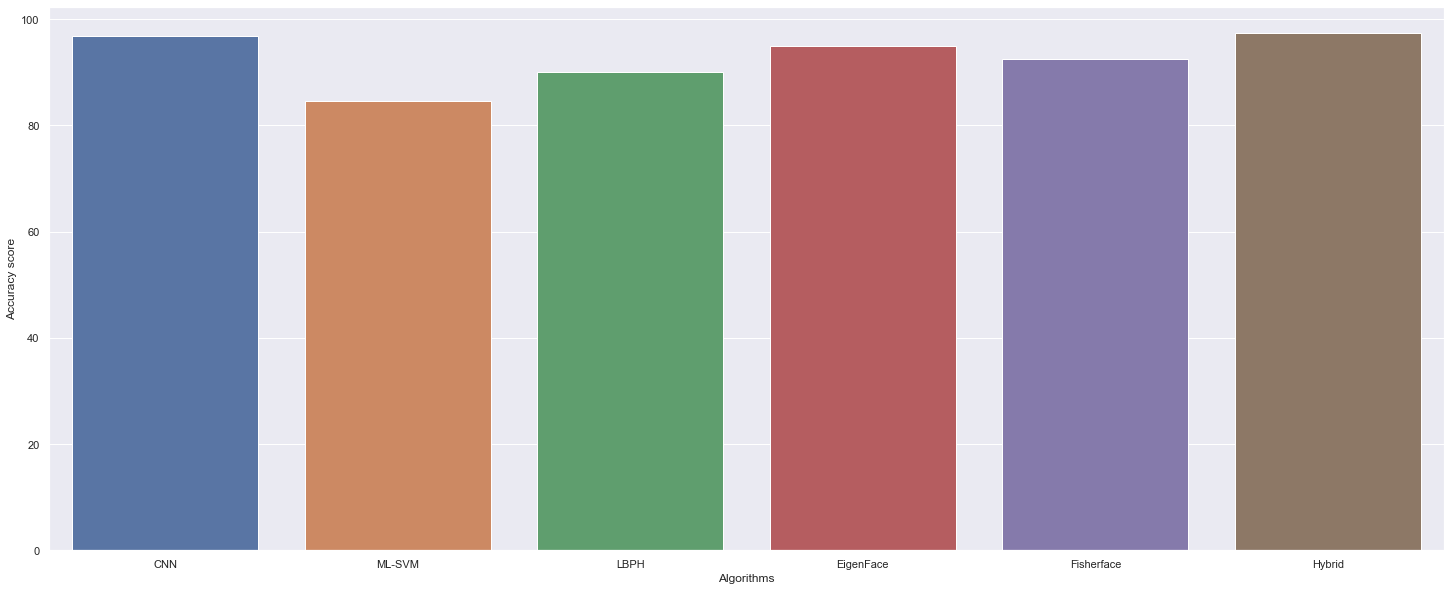

In [44]:
sns.set(rc={'figure.figsize':(25,10)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)